jupyter nbconvert --to slides --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.6.2"

In [1]:
import pods
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

#### MLAI Week 4: Basis Functions

### Neil D. Lawrence

### 20th October 2015

### Review
- Last time: explored least squares for univariate and multivariate regression.
- Introduced matrices, linear algebra and derivatives.
- This time: introduce *basis functions* for non-linear regression models.

### Nonlinear Regression

-   Problem with Linear Regression—$\mathbf{x}$ may not be linearly
    related to $\mathbf{y}$.

-   Potential solution: create a feature space: define
    $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a
    nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$

In [ ]:
# %load -s polynomial mlai.py
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    "Polynomial basis"
    centre = data_limits[0]/2. + data_limits[1]/2.
    span = data_limits[1] - data_limits[0]
    z = x - centre
    z = 2*z/span
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = z**i
    return Phi

In [11]:
# %load -s plot_basis mlai.py
def plot_basis(basis, x_min, x_max, fig, ax, loc, text, diagrams='./diagrams', fontsize=20):
    """Plot examples of the basis vectors."""
    x = np.linspace(x_min, x_max, 100)[:, None]

    Phi = basis(x, num_basis=3)

    ax.plot(x, Phi[:, 0], '-', color=[1, 0, 0], linewidth=3)
    ylim = [-2, 2]
    ax.set_ylim(ylim)
    plt.sca(ax)
    plt.yticks([-2, -1, 0, 1, 2])
    plt.xticks([-1, 0, 1])
    ax.text(loc[0][0], loc[0][1],text[0], horizontalalignment='center', fontsize=20)
    ax.set_xlabel('$x$', fontsize=fontsize)
    ax.set_ylabel('$\phi(x)$', fontsize=fontsize)

    plt.savefig(diagrams + '/' + basis.__name__ + '_basis1.svg')

    ax.plot(x, Phi[:, 1], '-', color=[1, 0, 1], linewidth=3)
    ax.text(loc[1][0], loc[1][1], text[1], horizontalalignment='center', fontsize=fontsize)

    plt.savefig(diagrams + '/' + basis.__name__ + '_basis2.svg')

    ax.plot(x, Phi[:, 2], '-', color=[0, 0, 1], linewidth=3)
    ax.text(loc[2][0], loc[2][1], text[2], horizontalalignment='center', fontsize=fontsize)

    plt.savefig(diagrams + '/' + basis.__name__ + '_basis3.svg')


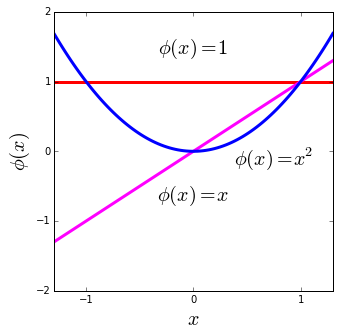

In [12]:
import mlai
f, ax = plt.subplots(figsize=(5, 5))
x_min = -1.3
x_max = 1.3
basis=polynomial

loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = x$',
       '$\phi(x) = x^2$']
plot_basis(polynomial, x_min=-1.3, x_max=1.3, fig=f, ax=ax, loc=loc, text=text)    


### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\mathbf{\phi} = [1, x, x^2]$$
    
<center><img src="./diagrams/polynomial_basis1.svg", width=60%></center>

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\mathbf{\phi} = [1, x, x^2]$$
    
<center><img src="./diagrams/polynomila_basis2.svg", width=60%></center>

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
     $$\mathbf{\phi} = [1, x, x^2]$$
   
<center><img src="./diagrams/polynomial_basis3.svg", width=60%></center>

In [ ]:
f, ax = plt.subplots(figsize=(5,5))


w = np.random.normal(size=(3, 1))
f = np.dot(Phi,w)
a, = ax.plot(x, f, color=[0, 0, 1], linewidth=3)
ax.plot(x, Phi[:, 0], color=[1, 0, 0], linewidth=1) 
ax.plot(x, Phi[:, 1], color=[1, 0, 1], linewidth=1)
ax.plot(x, Phi[:, 2], color=[0, 0, 1], linewidth=1) 
ylim = [-4, 3]
ax.set_ylim(ylim)
plt.sca(ax)
plt.xticks([-1, 0, 1]) 
ax.set_xlabel('$x$', fontsize=20) 
ax.set_ylabel('$f(x)$', fontsize=20)
t = []
for i in range(w.shape[0]):
    t.append(ax.text(loc[i][0], loc[i][1], '$w_' + str(i) + ' = '+ str(w[i]) + '$', horizontalalignment='center', fontsize=20))

plt.savefig('./diagrams/quadraticFunction1.svg')

w = np.random.normal(size=(3, 1)) 
f = np.dot(Phi,w) 
a.set_ydata(f)
for i in range(3):
    t[i].set_text('$w_' + str(i) + ' = '+ str(w[i]) + '$')
plt.savefig('./diagrams/quadraticFunction2.svg')


w = np.random.normal(size=(3, 1)) 
f = np.dot(Phi, w) 
a.set_ydata(f)
for i in range(3):
    t[i].set_text('$w_' + str(i) + ' = '+ str(w[i]) + '$')
plt.savefig('./diagrams/quadraticFunction3.svg')

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_0} + {\color{\magentaColor}w_1x} + {\color{\blueColor}w_2 x^2}$$

<center><img src="./diagrams/quadraticFunction1.svg", width=60%></center>

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_1} + {\color{\magentaColor}w_2x} + {\color{\blueColor}w_3 x^2}$$

<center><img src="./diagrams/quadraticFunction2.svg", width=60%></center>

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_1} + {\color{\magentaColor}w_2x} + {\color{\blueColor}w_3 x^2}$$

<center><img src="./diagrams/quadraticFunction3.svg", width=60%></center>

In [ ]:
# %load -s radial mlai.py
def radial(x, num_basis=4, data_limits=[-1., 1.]):
    "Radial basis constructed using exponentiated quadratic form."
    if num_basis>1:
        centres=np.linspace(data_limits[0], data_limits[1], num_basis)
        width = (centres[1]-centres[0])/2.
    else:
        centres = np.asarray([data_limits[0]/2. + data_limits[1]/2.])
        width = (data_limits[1]-data_limits[0])/2.
    
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = np.exp(-0.5*((x-centres[i])/width)**2)
    return Phi


In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
x_min = -2
x_max = 2
x = np.linspace(x_min, x_max, 100)[:, None]

Phi = radial(x, 3)

loc = [[-1.25, -0.4],
       [0., 1.25],
       [1.25, -0.4]]
text = ['$\phi_1(x) = e^{-(x + 1)^2}$',
        '$\phi_2(x) = e^{-2x^2}$', 
        '$\phi_3(x) = e^{-2(x-1)^2}$']
ax.plot(x, Phi[:, 0], '-', color=[1, 0, 0], linewidth=3)
ylim = [-2, 2]
ax.set_ylim(ylim)
plt.sca(ax)
plt.yticks([-2, -1, 0, 1, 2])
plt.xticks([-1, 0, 1])
ax.text(loc[0][0], loc[0][1],text[0], horizontalalignment='center', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$\phi(x)$', fontsize=20)

plt.savefig('./diagrams/radialBasis1.svg')

ax.plot(x, Phi[:, 1], '-', color=[1, 0, 1], linewidth=3)
ax.text(loc[1][0], loc[1][1], text[1], horizontalalignment='center', fontsize=20)

plt.savefig('./diagrams/radialBasis2.svg')

ax.plot(x, Phi[:, 2], '-', color=[0, 0, 1], linewidth=3)
ax.text(loc[2][0], loc[2][1], text[2], horizontalalignment='center', fontsize=20)

plt.savefig('./diagrams/radialBasis3.svg')

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radialBasis1.svg", width=60%></center>

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radialBasis2.svg", width=60%></center>

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radialBasis3.svg", width=60%></center>

In [ ]:
f, ax = plt.subplots(figsize=(7,7))

w = np.random.normal(size=(3, 1))
f = np.dot(Phi,w)
a, = ax.plot(x, f, color=[0, 0, 1], linewidth=3)
ax.plot(x, phi[0], color=[1, 0, 0], linewidth=1) 
ax.plot(x, phi[1], color=[1, 0, 1], linewidth=1)
ax.plot(x, phi[2], color=[0, 0, 1], linewidth=1) 
ylim = [-4, 3]
ax.set_ylim(ylim)
plt.sca(ax)
plt.xticks([-1, 0, 1]) 
ax.set_xlabel('$x$', fontsize=20) 
ax.set_ylabel('$f(x)$', fontsize=20)
t = []
for i in range(w.shape[0]):
    t.append(ax.text(loc[i][0], loc[i][1], '$w_' + str(i) + ' = '+ str(w[i]) + '$', horizontalalignment='center', fontsize=20))

plt.savefig('./diagrams/radialFunction1.svg')

w = np.random.normal(size=(3, 1)) 
f = np.dot(Phi,w) 
a.set_ydata(f)
for i in range(3):
    t[i].set_text('$w_' + str(i) + ' = '+ str(w[i]) + '$')
plt.savefig('./diagrams/radialFunction2.svg')


w = np.random.normal(size=(3, 1)) 
f = np.dot(Phi, w) 
a.set_ydata(f)
for i in range(3):
    t[i].set_text('$w_' + str(i) + ' = '+ str(w[i]) + '$')
plt.savefig('./diagrams/radialFunction3.svg')

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radialFunction1.svg", width=60%></center>

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radialFunction2.svg", width=60%></center>

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radialFunction3.svg", width=60%></center>

### Basis Function Models

-   The *prediction function* is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j}$$


## Vector Notation

-   Write in vector notation,
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \mathbf{\phi}_i$$

### Log Likelihood for Basis Function Model

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}\right).$$

### Log Likelihood for Basis Function Model

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}.$$

 

### Objective Function

- And a corresponding *objective function* of the form
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}.$$

### Expand the Brackets

$$\begin{align}
  E(\mathbf{w},\sigma^2) =  &\frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}\sum _{i=1}^{n}y_i\mathbf{w}^{\top}\mathbf{\phi}_i\\ &+\frac{1}{2\sigma^2}\sum _{i=1}^{n}\mathbf{w}^{\top}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\mathbf{w} +\text{const}.\end{align}$$
 

 ### Expand the Brackets
 $$ \begin{align} E(\mathbf{w}, \sigma^2) = & \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}
  \mathbf{w}^\top\sum_{i=1}^{n}\mathbf{\phi}_i y_i\\ & +\frac{1}{2\sigma^2} \mathbf{w}^{\top}\left[\sum
    _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]\mathbf{w} +\text{const}.\end{align}$$

### Multivariate Derivatives Reminder

-   We will need some multivariate calculus.
    $$\frac{\text{d}\mathbf{a}^{\top}\mathbf{w}}{\text{d}\mathbf{w}}=\mathbf{a}$$
    and
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=\left(\mathbf{A}+\mathbf{A}^{\top}\right)\mathbf{w}$$
    or if $\mathbf{A}$ is symmetric (*i.e.*
    $\mathbf{A}=\mathbf{A}^{\top}$)
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=2\mathbf{A}\mathbf{w}.$$

### Differentiate

Differentiating with respect to the vector $\mathbf{w}$ we obtain
$$\frac{\text{d} E\left(\mathbf{w},\sigma^2 \right)}{\text{d} \mathbf{w}}=-\frac{1}{\sigma^2} \sum _{i=1}^{n}\mathbf{\phi}_iy_i+\frac{1}{\sigma^2} \left[\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]\mathbf{w}$$
Leading to
$$\mathbf{w}^{*}=\left[\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]^{-1}\sum _{i=1}^{n}\mathbf{\phi}_iy_i,$$

### Matrix Notation

Rewrite in matrix notation:
$$\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^\top = \mathbf{\Phi}^\top \mathbf{\Phi}$$
$$\sum _{i=1}^{n}\mathbf{\phi}_iy_i = \mathbf{\Phi}^\top \mathbf{y}$$

### Update Equations

-   Update for $\mathbf{w}^{*}$.
    $$\mathbf{w}^{*} = \left(\mathbf{\Phi}^\top \mathbf{\Phi}\right)^{-1} \mathbf{\Phi}^\top \mathbf{y}$$

-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\mathbf{\phi}_i\right)^{2}}{n}.$$

### Avoid Direct Inverse

- E.g. Solve for $\mathbf{w}$
  $$\left(\mathbf{\Phi}^\top \mathbf{\Phi}\right)\mathbf{w} = \mathbf{\Phi}^\top \mathbf{y}$$
  
- See `np.linalg.solve`

- In practice use $\mathbf{Q}\mathbf{R}$ decomposition (see lab class notes).

### Polynomial Fits to Olympic Data

In [ ]:
# %load -s LM mlai.py
class LM():
    """Linear model
    :param X: input values
    :type X: numpy.ndarray
    :param y: target values
    :type y: numpy.ndarray
    :param basis: basis function 
    :param type: function"""

    def __init__(self, X, y, basis, **kwargs):

        self.Phi = basis(X, **kwargs)
        self.X = X
        self.y = y
        self.num_data = y.shape[0]
        self.sigma2 = sigma2
        self.basis = basis
        self.basis_args = kwargs

    def update_QR(self):
        """Perform the QR decomposition on the basis matrix."""
        self.Q, self.R = np.linalg.qr(self.Phi)

    def fit(self):
        """Minimize the objective function with respect to the parameters"""
        self.update_QR()
        self.w_star = sp.linalg.solve_triangular(self.R, np.dot(self.Q.T, self.y))
        self.update_sum_squares()
        self.sigma2=self.sum_squares/self.num_data

    def predict(self, X):
        """Return the result of the prediction function."""
        return np.dot(basis(X, self.kwargs), self.w_star)
        
    def update_f(self):
        """Update values at the prediction points."""
        self.f = np.dot(self.Phi, self.w_star)
        
    def update_sum_squares(self):
        """Compute the sum of squares error."""
        self.update_f()
        self.sum_squares = ((self.y-self.f)**2).sum()
        
    def objective(self):
        """Compute the objective function."""
        self.update_sum_squares()
        return self.sum_squares

    def log_likelihood(self):
        """Compute the log likelihood."""
        self.update_sum_squares()
        return -num_data/2.*np.log(np.pi*2.)-num_data/2.*np.log(sigma2)-self.sum_squares/(2.*self.sigma2)


In [ ]:
# %load -s polynomial mlai.py
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    "Polynomial basis"
    centre = data_limits[0]/2. + data_limits[1]/2.
    span = data_limits[1] - data_limits[0]
    z = x - centre
    z = 2*z/span
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = z**i
    return Phi


In [ ]:
# %load -s radial mlai.py
def radial(x, num_basis=4, data_limits=[-1., 1.]):
    "Radial basis constructed using exponentiated quadratic form."
    if num_basis>1:
        centres=np.linspace(data_limits[0], data_limits[1], num_basis)
        width = (centres[1]-centres[0])/2.
    else:
        centres = np.asarray([data_limits[0]/2. + data_limits[1]/2.])
        width = (data_limits[1]-data_limits[0])/2.
    
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = np.exp(-0.5*((x-centres[i])/width)**2)
    return Phi


In [ ]:
basis = radial

data = pods.datasets.olympic_marathon_men()
f, ax = plt.subplots(1, 2, figsize=(14,7))
#ax.plot(data['X'], data['Y'], 'rx', markersize=10)
x = data['X']
y = data['Y']

data_limits = [1892, 2020]
max_basis = 7

x_pred = np.linspace(data_limits[0], data_limits[1], 130)[:, None]

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))

for num_basis in range(max_basis):
    
    model=LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    sum_squares[order] = model.objective() 
    ll[order] = model.log_likelihood()
    
    ax[0].cla()
    ax[0].plot(x, y, 'o', color=[1, 0, 0], markersize=6, linewidth=3)
    ylim = ax[0].get_ylim()
    ax[0].plot(x_pred, y_pred, color=[0, 0, 1], linewidth=2)
    ax[0].set_xlabel('year', fontsize=20)
    ax[0].set_ylim(ylim)
    plt.sca(ax[0])
    plt.xticks([1892, 1932, 1972, 2012])

    xlim = ax[0].get_xlim()
    
   
    ax[1].plot(range(0,max_basis), sum_squares, 'o', color=[1, 0, 0], markersize=6, linewidth=3)
    ax[1].set_ylim([0, 8])
    ax[1].set_xlim([-1, max_basis])
    ax[1].set_xlabel('polynomial order', fontsize=20)

    file_name = 'olympic_' + basis.__name__ + str(num_basis) + '.svg'
    plt.savefig('./diagrams/'+file_name)


In [ ]:
%debug

![](./diagrams/olympic_poly1.svg) 

![](./diagrams/olympic_poly2.svg) 

![](./diagrams/olympic_poly3.svg) 

![](./diagrams/olympicPoly4.svg) 

![](./diagrams/olympic_poly5.svg) 

![](./diagrams/olympic_poly6.svg) 

![](./diagrams/olympic_poly7.svg) 

#### Reading

- Section 1.4 of @Rogers:book11.
- Chapter 1, pg 1-6 of @Bishop:book06.
- Chapter 3, Section 3.1 of @Bishop:book06 up to pg 143.

 